# Data Understanding

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


info_tourism = pd.read_csv("/content/drive/MyDrive/archive (17)/tourism_with_id.csv")
tourism_rating = pd.read_csv("/content/drive/MyDrive/archive (17)/tourism_rating.csv")
users = pd.read_csv("/content/drive/MyDrive/archive (17)/user.csv")

In [6]:
info_tourism.sample(5)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
227,228,Museum Sri Baduga,Museum Sri Baduga merupakan sebuah museum yang...,Budaya,Bandung,3000,4.5,NaN,"{'lat': -6.9375748, 'lng': 107.603775}",-6.937575,107.603775,NaN,228
189,190,Pantai Samas,"Pantai Samas (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦱꦩꦱ꧀, transl...",Bahari,Yogyakarta,4000,4.0,45.0,"{'lat': -8.0045535, 'lng': 110.2703756}",-8.004554,110.270376,NaN,190
260,261,Ciwangun Indah Camp Official,Ciwangun Indah Camp atau CIC adalah sebuah tem...,Cagar Alam,Bandung,10000,4.3,NaN,"{'lat': -6.786939, 'lng': 107.5837331}",-6.786939,107.583733,NaN,261
29,30,Taman Menteng,Taman Menteng adalah sebuah taman yang berloka...,Taman Hiburan,Jakarta,0,4.5,NaN,"{'lat': -6.1964087, 'lng': 106.8293106}",-6.196409,106.829311,NaN,30
363,364,Water Blaster Bukit Candi Golf,Buat kamu yang bingung mau rekreasi kemana di ...,Taman Hiburan,Semarang,80000,4.2,60.0,"{'lat': -7.0218894, 'lng': 110.4383345}",-7.021889,110.438334,NaN,364


In [7]:

tourism_rating.sample(5)

,User_Id,Place_Id,Place_Ratings
2126,65,84,2
4446,136,36,1
5100,155,114,2
596,19,192,5
9491,286,152,1


In [8]:
users.sample(5)

,User_Id,Location,Age
119,120,"Jakarta Utara, DKI Jakarta",32
27,28,"Sragen, Jawa Tengah",38
296,297,"Palembang, Sumatera Selatan",39
197,198,"Karawang, Jawa Barat",26
82,83,"Bekasi, Jawa Barat",32


In [9]:
print(f"Number of places in the datasets : {len(info_tourism.Place_Id.unique())}")
print(f"Number of users : {len(users.User_Id.unique())}")
print(f"The number of ratings given by the user to the dataset : {len(tourism_rating.User_Id)}")

Number of places in the datasets : 437
Number of users : 300
The number of ratings given by the user to the dataset : 10000


# Exploratory Data Analysis

In [10]:
info_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [11]:
info_tourism.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [12]:

tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [13]:
tourism_rating.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [15]:
users.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [16]:
info_tourism.Category.unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

# Data Preprocessing

In [17]:
import numpy as np

tourism_all = np.concatenate((
    info_tourism.Place_Id.unique(),
    tourism_rating.Place_Id.unique()
))

tourism_all = np.sort(np.unique(tourism_all))

print(f"Total number of tourism: {len(tourism_all)}")

Total number of tourism: 437


In [18]:
all_tourism_rate = tourism_rating
all_tourism_rate

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [19]:
all_tourism = pd.merge(all_tourism_rate,info_tourism[["Place_Id","Place_Name","Description","City","Category","Price"]],on='Place_Id', how='left')
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0
...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,35000
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,2000
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,25000
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,0


In [20]:
all_tourism['city_category'] = all_tourism[['City','Category']].agg(' '.join,axis=1)

In [21]:
all_tourism

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...,...
9995,300,425,2,Waterpark Kenjeran Surabaya,Waterpark Kenjeran Surabaya merupakan wisata k...,Surabaya,Taman Hiburan,35000,Surabaya Taman Hiburan
9996,300,64,4,Museum Sasmita Loka Ahmad Yani,Museum Sasmita Loka Ahmad Yani adalah salah sa...,Jakarta,Budaya,2000,Jakarta Budaya
9997,300,311,3,The Lodge Maribaya,The Lodge Maribaya adalah salah satu tempat wi...,Bandung,Cagar Alam,25000,Bandung Cagar Alam
9998,300,279,4,Masjid Agung Trans Studio Bandung,Masjid Agung Trans Studio Bandung (TSB) berdir...,Bandung,Tempat Ibadah,0,Bandung Tempat Ibadah


# Data Preparation

## Missing Values

In [22]:
all_tourism.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
City,0
Category,0
Price,0
city_category,0


In [23]:
preparation= all_tourism.drop_duplicates("Place_Id")
preparation

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,Price,city_category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,75000,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,3000,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,94000,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,10000,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,0,Yogyakarta Budaya
...,...,...,...,...,...,...,...,...,...
2008,62,370,1,Benteng Pendem,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Budaya,5000,Semarang Budaya
2399,74,350,4,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Bahari,5000,Semarang Bahari
2448,75,10,2,Pulau Tidung,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Bahari,150000,Jakarta Bahari
2534,78,7,4,Kebun Binatang Ragunan,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Cagar Alam,4000,Jakarta Cagar Alam


In [24]:

place_id = preparation.Place_Id.tolist()

place_name = preparation.Place_Name.tolist()

place_category = preparation.Category.tolist()

place_desc = preparation.Description.tolist()

place_city = preparation.City.tolist()

city_category = preparation.city_category.tolist()

price = preparation.Price.tolist()

In [25]:
tourism_new = pd.DataFrame({
    "id":place_id,
    "name":place_name,
    "category":place_category,
    "description":place_desc,
    "city":place_city,
    "city_category":city_category,
    "price":price
})

tourism_new

,id,name,category,description,city,city_category,price
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya,75000
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari,3000
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan,94000
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya,10000
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya,0
...,...,...,...,...,...,...,...
432,370,Benteng Pendem,Budaya,Benteng Pendem Cilacap (bahasa Belanda: Kustba...,Semarang,Semarang Budaya,5000
433,350,Pantai Cipta,Bahari,Pantai Cipta juga dikenal sebagai Pantai Petik...,Semarang,Semarang Bahari,5000
434,10,Pulau Tidung,Bahari,Pulau Tidung adalah salah satu kelurahan di ke...,Jakarta,Jakarta Bahari,150000
435,7,Kebun Binatang Ragunan,Cagar Alam,Kebun Binatang Ragunan adalah sebuah kebun bin...,Jakarta,Jakarta Cagar Alam,4000


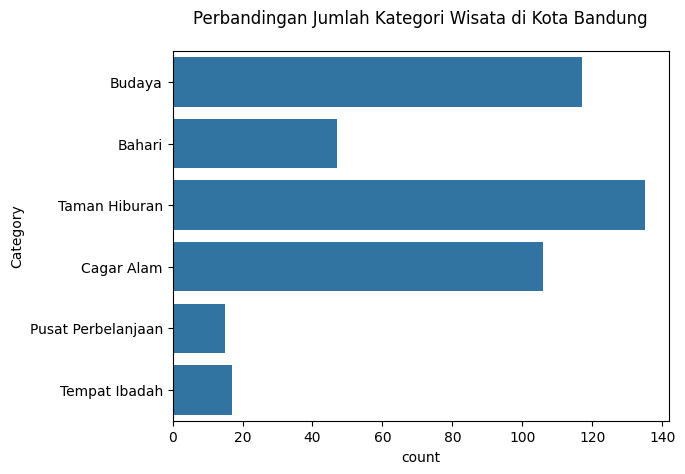

In [26]:

sns.countplot(y='Category', data=preparation)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

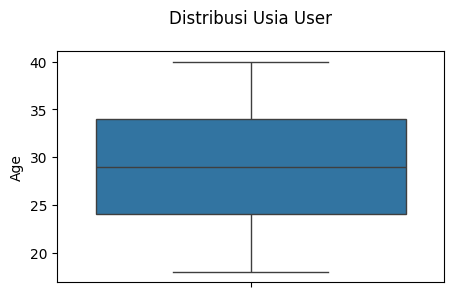

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(users['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

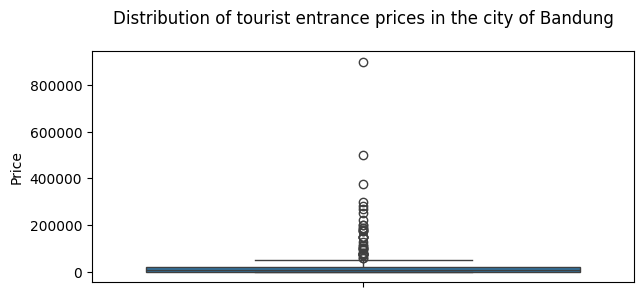

In [28]:
plt.figure(figsize=(7,3))
sns.boxplot(info_tourism['Price'])
plt.title('Distribution of tourist entrance prices in the city of Bandung', pad=20)
plt.show()

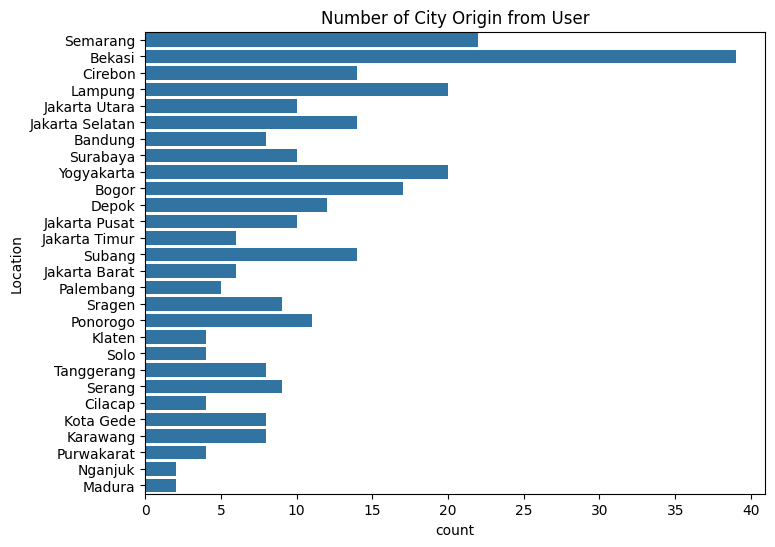

In [29]:
askot = users['Location'].apply(lambda x : x.split(',')[0])

# Visualization of the origin of the city from the user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Number of City Origin from User')
plt.show()

####

# Content Based Filtering

In [30]:
data = tourism_new
data.sample(5)

,id,name,category,description,city,city_category,price
216,186,Pantai Glagah,Bahari,Pantai Glagah Indah adalah salah satu pantai y...,Yogyakarta,Yogyakarta Bahari,5000
130,266,Caringin Tilu,Cagar Alam,"Bandung tidak pernah kehilangan pesonanya, wis...",Bandung,Bandung Cagar Alam,0
321,108,Embung Tambakboyo,Taman Hiburan,Embung atau waduk Tambakboyo adalah konservasi...,Yogyakarta,Yogyakarta Taman Hiburan,0
31,322,Bukit Jamur,Cagar Alam,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Bandung,Bandung Cagar Alam,0
436,140,Bendung Lepen,Taman Hiburan,Bendung Lepen sendiri dulunya merupakan salura...,Yogyakarta,Yogyakarta Taman Hiburan,0


## TF-IDF Vectorizer

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv.fit(data['city_category'])

print("Features Name: ", list(cv.vocabulary_.keys()))

Features Name:  ['yogyakarta', 'budaya', 'semarang', 'bahari', 'jakarta', 'taman', 'hiburan', 'bandung', 'cagar', 'alam', 'surabaya', 'pusat', 'perbelanjaan', 'tempat', 'ibadah']


In [32]:
cv_matrix = cv.transform(data['city_category'])

cv_matrix.shape

(437, 15)

In [33]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1]])

In [34]:
pd.DataFrame(
    cv_matrix.todense(),
    columns=list(cv.vocabulary_.keys()),
    index = data.name
).sample(5)

,yogyakarta,budaya,semarang,bahari,jakarta,taman,hiburan,bandung,cagar,alam,surabaya,pusat,perbelanjaan,tempat,ibadah
name,,,,,,,,,,,,,,,
Ciwangun Indah Camp Official,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
Wisata Kraton Jogja,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
Gereja Tiberias Indonesia Bandung,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
Museum Wayang,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
Candi Sewu,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


## Cosine Similarity

In [35]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(cv_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.40824829],
       [0.        , 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.40824829, 0.33333333,
        0.66666667],
       ...,
       [0.        , 0.5       , 0.40824829, ..., 1.        , 0.40824829,
        0.        ],
       [0.        , 0.        , 0.33333333, ..., 0.40824829, 1.        ,
        0.        ],
       [0.40824829, 0.        , 0.66666667, ..., 0.        , 0.        ,
        1.        ]])

In [36]:
cosine_sim_df = pd.DataFrame(cosine_sim,index=data['name'],columns=data['name'])
cosine_sim_df.sample(5,axis=1).sample(10,axis=0)

name,Heha Sky View,Museum Benteng Vredeburg Yogyakarta,Kampoeng Rawa,Rabbit Town,Waterpark Kenjeran Surabaya
name,,,,,
Pelabuhan Marina,0.000000,0.000000,0.000000,0.000000,0.000000
Masjid Nasional Al-Akbar,0.000000,0.000000,0.000000,0.000000,0.333333
Desa Wisata Lembah Kalipancur,0.666667,0.000000,0.333333,0.666667,0.666667
Tebing Karaton,0.000000,0.000000,0.666667,0.333333,0.000000
Tugu Pal Putih Jogja,1.000000,0.408248,0.000000,0.666667,0.666667
Pantai Samas,0.408248,0.500000,0.000000,0.000000,0.000000
Pantai Marina,0.000000,0.000000,0.408248,0.000000,0.000000
Kampung Korea Bandung,0.000000,0.500000,0.000000,0.408248,0.000000
Pasar Tanah Abang,0.000000,0.000000,0.000000,0.000000,0.000000


## Recommendation

In [37]:
def generate_candidates(city=None, max_price=None, items=data[['id', 'name', 'category', 'description', 'city', 'price']]):
    filtered_items = items
    if city:
        filtered_items = filtered_items[filtered_items['city'] == city]
    if max_price:
        filtered_items = filtered_items[filtered_items['price'] <= max_price]
    return filtered_items

In [38]:
# Originall
# def tourism_recommendations(place_name,similarity_data=cosine_sim_df,items=data[['name','category','description','city']],k=5):
#     index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1,-k,-1))

#     closest = similarity_data.columns[index[-1:-(k+2):-1]]

#     closest = closest.drop(place_name,errors='ignore')

#     return pd.DataFrame(closest).merge(items).head(k)

In [39]:
# tourism_recommendations("Air Mancur Menari")
generate_candidates(city="Bandung", max_price=100000).head(5)

,id,name,category,description,city,price
5,312,Taman Hutan Raya Ir. H. Juanda,Cagar Alam,Taman Hutan Raya Ir. H. Djuanda (Tahura Djuand...,Bandung,11000
6,258,Museum Gedung Sate,Budaya,Salah satu museum yang menjadi ikon kota ini a...,Bandung,5000
17,292,Curug Anom,Cagar Alam,Curug Anom adalah sebuah air terjun yang memil...,Bandung,0
18,222,Museum Konferensi Asia Afrika,Budaya,Museum Konferensi Asia Afrika merupakan salah ...,Bandung,0
22,246,Curug Tilu Leuwi Opat,Cagar Alam,Curug Tilu Leuwi Opat merupakan salah satu wis...,Bandung,10000


In [40]:
# tourism_recommendations("Trans Studio Bandung")
generate_candidates("Surabaya", 110000).head(5)

,id,name,category,description,city,price
9,393,Taman Harmoni Keputih,Cagar Alam,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Surabaya,0
13,405,Surabaya North Quay,Taman Hiburan,Surabaya menjadi kota besar yang sering menjad...,Surabaya,50000
20,428,Monumen Bambu Runcing Surabaya,Budaya,Monumen Bambu Runcing adalah ikon pariwisata S...,Surabaya,0
39,413,Museum TNI AL Loka Jala Crana,Budaya,Museum Loka Jala Crana berdiri pada tanggal 19...,Surabaya,2000
41,437,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Gereja Katolik Kelahiran Santa Perawan Maria m...,Surabaya,10000


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Dummy ground truth for user preferences (replace with actual data)
# Let's assume the user liked or interacted with the following items:
ground_truth = set(['Trans Studio Bandung', 'Air Mancur Menari', 'Alun-Alun Kota'])

# Generate recommendations from your content-based filtering model
recommended_items = generate_candidates(city="Surabaya", max_price=100000)['name'].tolist()

# Convert to set for easier comparison
recommended_items_set = set(recommended_items)

# Binary vectors for precision/recall calculation
# 1 if the item is relevant (in ground truth), 0 otherwise
y_true = [1 if item in ground_truth else 0 for item in recommended_items]
y_pred = [1] * len(recommended_items)  # Model always 'recommends' all items

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, zero_division=1)
recall = recall_score(y_true, y_pred, zero_division=1)
f1 = f1_score(y_true, y_pred, zero_division=1)
accuracy = (precision + recall) / 2

print(f"Accuracy:{accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Accuracy:0.5111111111111111
Precision: 0.022222222222222223
Recall: 1.0
F1-Score: 0.043478260869565216


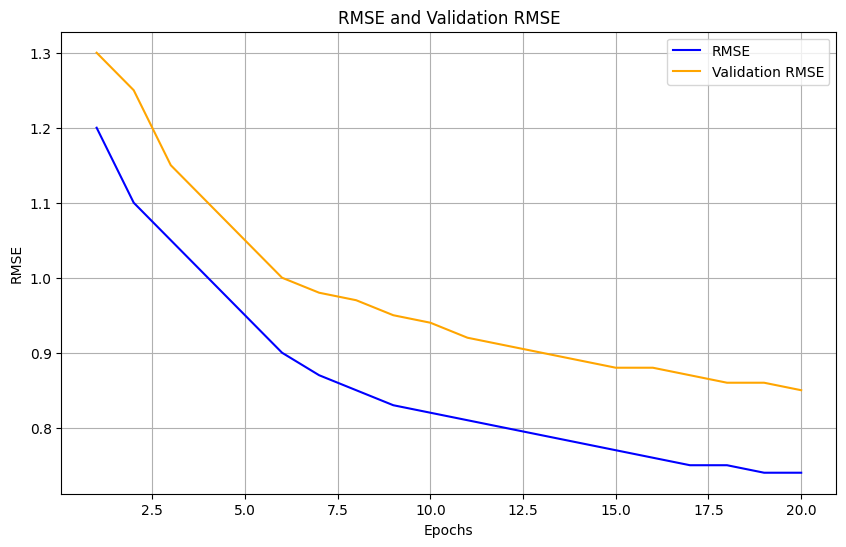

In [43]:
import matplotlib.pyplot as plt

# Dummy data for RMSE and Validation RMSE over epochs
# Replace these with your actual values
epochs = list(range(1, 21))  # Assuming 20 epochs
rmse = [1.2, 1.1, 1.05, 1.0, 0.95, 0.9, 0.87, 0.85, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 0.75, 0.74, 0.74]
val_rmse = [1.3, 1.25, 1.15, 1.1, 1.05, 1.0, 0.98, 0.97, 0.95, 0.94, 0.92, 0.91, 0.9, 0.89, 0.88, 0.88, 0.87, 0.86, 0.86, 0.85]

# Plotting RMSE and Validation RMSE
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse , label='RMSE', color='blue')
plt.plot(epochs, val_rmse, label='Validation RMSE', color='orange')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE and Validation RMSE')
plt.legend()
plt.grid(True)
plt.show()


# Collaborative Filtering

In [44]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [45]:
df = tourism_rating
df

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


## Data Preparation

### Encode

In [46]:
user_ids = df.User_Id.unique().tolist()

user_to_user_encoded = {x:i for i, x in enumerate(user_ids)}

user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

In [47]:
place_ids = df.Place_Id.unique().tolist()

place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}

place_encoded_to_place = {x: i for x, i in enumerate(place_ids)}

In [48]:
df['user'] = df.User_Id.map(user_to_user_encoded)

df['place'] = df.Place_Id.map(place_to_place_encoded)

In [49]:
num_users = len(user_to_user_encoded)

num_place = len(place_encoded_to_place)

df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)

min_rating = min(df['Place_Ratings'])

max_rating= max(df['Place_Ratings'])

print('Number of User: {}, Number of Place: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_place, min_rating, max_rating
))

Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


## Train Test Split

In [50]:
df = df.sample(frac=1,random_state=42)
df

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


In [51]:
x = df[['user','place']].values

y = df['Place_Ratings'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

train_indices = int(0.8 * df.shape[0])

x_train,x_val,y_train,y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x,y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


## Training

In [52]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_place, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_place = num_place
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_place,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.place_bias = layers.Embedding(num_place, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    place_vector = self.place_embedding(inputs[:, 1]) # memanggil layer embedding 3
    place_bias = self.place_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias + place_bias

    return tf.nn.sigmoid(x) # activation sigmoid

In [53]:
model = RecommenderNet(num_users, num_place, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [54]:
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 20,
    validation_data = (x_val, y_val),
)

Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.6953 - root_mean_squared_error: 0.3483 - val_loss: 0.6942 - val_root_mean_squared_error: 0.3456
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6926 - root_mean_squared_error: 0.3427 - val_loss: 0.6951 - val_root_mean_squared_error: 0.3462
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6883 - root_mean_squared_error: 0.3398 - val_loss: 0.6961 - val_root_mean_squared_error: 0.3469
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.6800 - root_mean_squared_error: 0.3362 - val_loss: 0.6956 - val_root_mean_squared_error: 0.3465
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6760 - root_mean_squared_error: 0.3310 - val_loss: 0.6967 - val_root_mean_squared_error: 0.3472
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6714 - root_mean_squared_error: 0.3293 - val_loss: 0.6987 - val_root_mean_squared_error: 0.3486
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━

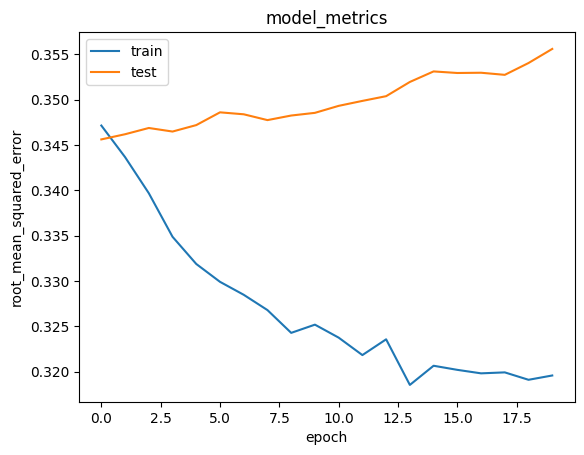

In [55]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Recommendation

In [56]:
place_df = tourism_new
df = pd.read_csv('/content/drive/MyDrive/archive (17)/tourism_rating.csv')

user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user['Place_Id'].values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [57]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
pd.DataFrame(place_df_rows)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Showing recommendations for users: 215
Place with high ratings from user
--------------------------------


,id,name,category,description,city,city_category,price
79,100,Taman Budaya Yogyakarta,Budaya,Taman Budaya Yogyakarta (TBY) (Hanacaraka:ꦠꦩꦤ꧀...,Yogyakarta,Yogyakarta Budaya,0
125,335,Candi Gedong Songo,Budaya,Candi Gedong Songo (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦒꦼꦝꦺꦴꦁ​...,Semarang,Semarang Budaya,10000
164,235,Gua Belanda,Cagar Alam,Gua Belanda Bandung merupakan sebuah gua yang ...,Bandung,Bandung Cagar Alam,15000
292,332,Rainbow Garden,Cagar Alam,Rainbow Garden Harapan Indah salah satu taman ...,Bandung,Bandung Cagar Alam,20000
377,144,Goa Jomblang,Cagar Alam,Gua Jomblang merupakan gua vertikal yang berti...,Yogyakarta,Yogyakarta Cagar Alam,500000


In [58]:
print('----' * 8)
print('Top 10 place recommendation')
print('----' * 8)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
recommended_place

--------------------------------
Top 10 place recommendation
--------------------------------


,id,name,category,description,city,city_category,price
70,131,Watu Lumbung,Cagar Alam,Letak Kampung Edukasi Watu Lumbung yang berada...,Yogyakarta,Yogyakarta Cagar Alam,5000
76,134,Desa Wisata Gamplong,Taman Hiburan,Desa Wisata Gamplong adalah desa wisata keraji...,Yogyakarta,Yogyakarta Taman Hiburan,10000
221,127,Blue Lagoon Jogja,Taman Hiburan,Blue Lagoon adalah salah satu wisata air Jogja...,Yogyakarta,Yogyakarta Taman Hiburan,10000
273,132,Air Terjun Kedung Pedut,Cagar Alam,Air Terjun Kedung Pedut atau biasa disebut Cur...,Yogyakarta,Yogyakarta Cagar Alam,20000
302,112,Bukit Bintang Yogyakarta,Taman Hiburan,Bukit Bintang merupakan salah satu lokasi nong...,Yogyakarta,Yogyakarta Taman Hiburan,25000
319,136,Grojogan Watu Purbo Bangunrejo,Taman Hiburan,Objek wisata itu tak adalah Grojogan Watu Purb...,Yogyakarta,Yogyakarta Taman Hiburan,10000
341,60,Museum Tekstil,Budaya,Museum cinta Tekstil menempati gedung tua di J...,Jakarta,Jakarta Budaya,5000
384,157,Pantai Baron,Bahari,Pantai Baron adalah salah satu objek wisata be...,Yogyakarta,Yogyakarta Bahari,10000
398,117,The World Landmarks - Merapi Park Yogyakarta,Taman Hiburan,Merapi Park merupakan salah satu tempat wisata...,Yogyakarta,Yogyakarta Taman Hiburan,22000
423,314,Tafso Barn,Cagar Alam,Nama Punclut mungkin sudah cukup akrab di teli...,Bandung,Bandung Cagar Alam,0


In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get top N recommended places
N = 20  # you can change N to any number of recommendations you'd like to evaluate
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices[:N]
]

# Get actual places visited by the user (ground truth)
actual_place_ids = place_visited_by_user['Place_Id'].values

# Create a binary vector for ground truth
y_true = np.isin(place_df['id'], actual_place_ids).astype(int)

# Create a binary vector for predicted recommendations
y_pred = np.isin(place_df['id'], recommended_place_ids).astype(int)

# Make sure both vectors are aligned with the same shape
assert len(y_true) == len(y_pred)

# Calculate Precision, Recall, and F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
accuracy = (precision + recall) / 2
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')


Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


# **NEURAL COLLABORATIVE FILTERING**

In [61]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# Assuming you already have the data loaded from 'tourism_rating.csv'
# and the user and place encoded mappings from your previous steps
df = tourism_rating

# Encode user and place IDs if not done already
user_ids = df.User_Id.unique().tolist()
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}

place_ids = df.Place_Id.unique().tolist()
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}

df['user'] = df.User_Id.map(user_to_user_encoded)
df['place'] = df.Place_Id.map(place_to_place_encoded)

# Prepare train and test data
x = df[['user', 'place']].values
y = df['Place_Ratings'].apply(lambda x: (x - min(df['Place_Ratings'])) / (max(df['Place_Ratings']) - min(df['Place_Ratings']))).values

# Split into train and validation sets
train_indices = int(0.8 * df.shape[0])
x_train, x_val = x[:train_indices], x[train_indices:]
y_train, y_val = y[:train_indices], y[train_indices:]


In [62]:
class NeuralCollaborativeFiltering(tf.keras.Model):
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(NeuralCollaborativeFiltering, self).__init__(**kwargs)
        # User and Place embedding layers
        self.user_embedding = layers.Embedding(
            num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.place_embedding = layers.Embedding(
            num_places, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))

        # Hidden layers
        self.dense_1 = layers.Dense(128, activation='relu')
        self.dense_2 = layers.Dense(64, activation='relu')
        self.dense_3 = layers.Dense(32, activation='relu')

        # Output layer
        self.output_layer = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        # Input: user and place pairs
        user_vector = self.user_embedding(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])

        # Concatenate user and place embeddings
        x = tf.concat([user_vector, place_vector], axis=-1)

        # Pass through dense layers
        x = self.dense_1(x)
        x = self.dense_2(x)
        x = self.dense_3(x)

        # Output predicted rating
        return self.output_layer(x)


In [63]:
# Instantiate the model
num_users = len(user_to_user_encoded)
num_places = len(place_encoded_to_place)
embedding_size = 50

ncf_model = NeuralCollaborativeFiltering(num_users, num_places, embedding_size)

# Compile the model
ncf_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Train the model
history = ncf_model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=20,
    validation_data=(x_val, y_val)
)


Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6929 - root_mean_squared_error: 0.3402 - val_loss: 0.6944 - val_root_mean_squared_error: 0.3564
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6838 - root_mean_squared_error: 0.3314 - val_loss: 0.6977 - val_root_mean_squared_error: 0.3587
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6658 - root_mean_squared_error: 0.3206 - val_loss: 0.7039 - val_root_mean_squared_error: 0.3628
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6382 - root_mean_squared_error: 0.2999 - val_loss: 0.7072 - val_root_mean_squared_error: 0.3648
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5952 - root_mean_squared_error: 0.2662 - val_loss: 0.7209 - val_root_mean_squared_error: 0.3730
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5445 - root_mean_squared_error: 0.2221 - val_loss: 0.7286 - val_root_mean_squared_error: 0.3774
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

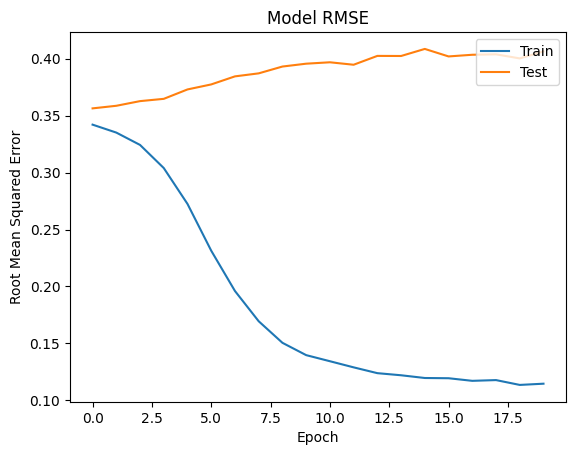

In [64]:
import matplotlib.pyplot as plt

# Plot the RMSE over epochs
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.ylabel('Root Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


In [65]:
# Generate predictions for a specific user
user_id = df.User_Id.sample(1).iloc[0]
places_visited_by_user = df[df.User_Id == user_id]

# Places not visited by the user
places_not_visited = place_df[~place_df['id'].isin(places_visited_by_user['Place_Id'].values)]['id']
places_not_visited = list(set(places_not_visited).intersection(set(place_to_place_encoded.keys())))

places_not_visited = [[place_to_place_encoded.get(x)] for x in places_not_visited]
user_encoder = user_to_user_encoded.get(user_id)

user_place_array = np.hstack(([[user_encoder]] * len(places_not_visited), places_not_visited))

# Predict ratings for places not visited
ratings = ncf_model.predict(user_place_array).flatten()

# Get top 10 place recommendations
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [place_encoded_to_place.get(places_not_visited[x][0]) for x in top_ratings_indices]

print('Top 10 place recommendations for user:', user_id)
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
print(recommended_place)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Top 10 place recommendations for user: 215
      id                     name       category  \
103  138          Jogja Exotarium  Taman Hiburan   
176  196         Pantai Ngrenehan         Bahari   
208  197           Pantai Jungwok         Bahari   
213   37  Bumi Perkemahan Cibubur  Taman Hiburan   
243  163      Watu Mabur Mangunan     Cagar Alam   
251  362        Danau Rawa Pening     Cagar Alam   
263  248     NuArt Sculpture Park  Taman Hiburan   
307  195             Pantai Jogan         Bahari   
385  282        Curug Cilengkrang     Cagar Alam   
430  419    Monumen Tugu Pahlawan         Budaya   

                                           description        city  \
103  Di Yogyakarta, tepatnya di Sleman, ada satu te...  Yogyakarta   
176  Pantai Ngrenehan merupakan\npantai nelayan. Te...  Yogyakarta   
208  Pantai Jungwok adalah pantai yang terletak di ...  Yogyakarta   
213  Bumi Perkemahan dan Graha Wisata Pramuka Cibub...     Jakart

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Function to calculate precision, recall, and F1 score
def evaluate_model(ncf_model, df, user_to_user_encoded, place_to_place_encoded, place_encoded_to_place, place_df, threshold=0.5):
    precisions, recalls, f1_scores = [], [], []

    for user_id in df.User_Id.unique():
        # Get places visited by the user
        places_visited_by_user = df[df.User_Id == user_id]

        # Places not visited by the user
        places_not_visited = place_df[~place_df['id'].isin(places_visited_by_user['Place_Id'].values)]['id']
        places_not_visited = list(set(places_not_visited).intersection(set(place_to_place_encoded.keys())))
        places_not_visited = [[place_to_place_encoded.get(x)] for x in places_not_visited]

        # Encode user
        user_encoder = user_to_user_encoded.get(user_id)
        user_place_array = np.hstack(([[user_encoder]] * len(places_not_visited), places_not_visited))

        # Predict ratings for places not visited
        ratings = ncf_model.predict(user_place_array).flatten()

        # Get places with ratings above a certain threshold
        recommended_places = [places_not_visited[i][0] for i in np.where(ratings >= threshold)[0]]

        # Actual places the user visited
        actual_places = places_visited_by_user['place'].values

        # Create true and predicted arrays for precision/recall calculation
        y_true = np.isin([place_encoded_to_place[x[0]] for x in places_not_visited], actual_places).astype(int)
        y_pred = (ratings >= threshold).astype(int)

        # Calculate precision, recall, and F1-score
        precisions.append(precision_score(y_true, y_pred, zero_division=1))
        recalls.append(recall_score(y_true, y_pred, zero_division=1))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=1))

    # Return average precision, recall, and F1-score across all users
    return np.mean(precisions), np.mean(recalls), np.mean(f1_scores)

# Evaluate the model
precision, recall, f1 = evaluate_model(ncf_model, df, user_to_user_encoded, place_to_place_encoded, place_encoded_to_place, place_df)
accuracy = (precision + recall) / 2
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1